# EDA
See `data/out/report.html` for a basic profiling report of the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_pickle('../data/out/data.pkl')
df.head()

,name,date,revenue,runtime,languages,countries,genres,summary,phrases
0,Blacksmith Scene,1893-01-01,NaN,0.566667,[Silent film],[United States of America],"[Black-and-white, Indie, Short Film, Silent film]",The scene is all filmed from a stationary came...,"[anvil, beer, blacksmith, camera, metal]"
1,Miss Jerry,1894-10-09,NaN,NaN,[Silent film],[United States of America],"[Black-and-white, Indie, Short Film, Silent film]",After finding out that her father is suffering...,"[Hamilton, London, York, editor, falls, financ..."
2,Corbett and Courtney Before the Kinetograph,1894-11-17,NaN,NaN,[Silent film],[United States of America],"[Black-and-white, Indie, Short Film, Silent film]",James J. Corbett and Peter Courtney both take ...,"[boxing, hero]"
3,La Mer,1895-01-01,NaN,0.633333,[Silent film],[France],"[Black-and-white, Documentary, Indie, Short Fi...",This 38 second film has a very simple plot in ...,"[film, jetty, water]"
4,Autour d'une cabine,1895-01-01,NaN,15.000000,[Silent film],[France],"[Animation, Comedy, Indie, Short Film, Silent ...",The film consists of a series of animations on...,"[beach, boat, diving, dog, film, play, swimmin..."


In [3]:
single, multi = [pd.read_csv(f'../model/autophrase/{f}', header=None, index_col=1, sep='\t', squeeze=True)
                 for f in ('AutoPhrase_single-word.txt', 'AutoPhrase_multi-words.txt')]

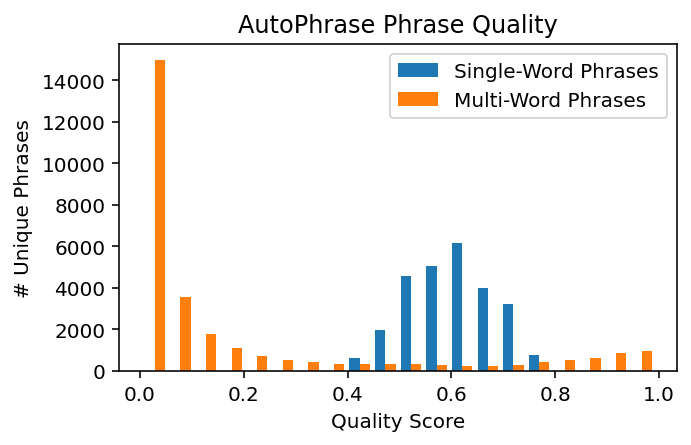

In [4]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.hist([single, multi], bins=20, label=['Single-Word Phrases', 'Multi-Word Phrases'])
ax.set(title='AutoPhrase Phrase Quality', xlabel='Quality Score', ylabel='# Unique Phrases')
ax.legend(loc='upper right');

In [5]:
single_examples, multi_examples, scores = [], [], []
for score in np.linspace(1, 0, 101):
    single_examples.append('' if (single - score).abs().min() > .01/2 else (single - score).abs().idxmin())
    multi_examples.append('' if (multi - score).abs().min() > .01/2 else (multi - score).abs().idxmin())
    scores.append(score)

with pd.option_context('display.max_rows', None):
    display(pd.DataFrame({
        'Score': scores,
        'Single-Word Phrase': single_examples,
        'Multi-Word Phrase': multi_examples
    }).set_index('Score'))

,Single-Word Phrase,Multi-Word Phrase
Score,,
1.00,,
0.99,,lois lane
0.98,,holy grail
0.97,,gold medal
0.96,,magic lamp
0.95,,singer songwriter
0.94,,toy store
0.93,,happy birthday
0.92,,community service
